# Pandas统计分析入门（1）
- 转载注明转自：https://github.com/liupengyuan/
- ## Pandas及相关python库简介
- ## 一维数据统计分析(Series基础)
- ## 二维数据统计分析(DataFrame基础)
- ## Visualization基础
---
## Pandas 简介

  pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

## Numpy 简介

  NumPy is the fundamental package for scientific computing with Python. It contains among other things:
- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

## Matplotlib 简介

Matplotlib是一个Python的2D绘图库，它以各种硬拷贝格式和跨平台的交互式环境生成出版质量级别的图形。
通过Matplotlib，开发者可以仅需要几行代码，便可以生成绘图，直方图，功率谱，条形图，错误图，散点图等。

## Seaborn 简介

Seaborn is a library for making attractive and informative statistical graphics in Python. It is built on top of matplotlib and tightly integrated with the PyData stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels.

---

- ## 程序头部引入

In [6]:
%matplotlib inline
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

以上引入各类利用pandas做数据分析可视化的模块，一般可作为每次数据分析项目/任务的起始代码，其中：
- `%matplotlib inline`是jupyter notebook的一个魔法命令，能够使基于matplotlib的绘图直接显示在网页中
- `from pandas import Series, DataFrame`，从pandas中引入最为常用的两个对象：Series及DataFrame

**注意**，在以上的引入中，类似`pd`、`np`、`plt`及`sns`均为约定俗成的习惯性名称，**不建议**更改。

---

## 一、一维数据统计分析(Series基础)

- 数据的描述、分析、可视化展示、概括性度量、输入与输出

### 1. Series对象及数据最基本展示

- 将以一个词频统计结果的实例，进行介绍。
- 教程中的各个代码段，请自行建立新的python程序，依次键入并顺序执行，观察执行结果。
- Series是pandas最重要最基础的数据对象，可用来表示数据表中的一列或一行。

In [7]:
words_freq = [200,300,400,350,390,600,900,400,300,120]
freq_dict = {'天长地久':words_freq}
total_words_freq = [12345000,23456000,22333000,45632000,11144000,65433000,44444000,55555000,34522000,55566000]
years = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]

以上代码中：
- `words_freq`，是“天长地久”在2006-2015年10年之间的频次list
- `freq_dict`，键为“天长地久”，值为其历时频次的list
- `total_words_freq`，是每年统计文本语料的总字数list
- `years`，是年份list

In [8]:
s = Series(words_freq)
s

0    200
1    300
2    400
3    350
4    390
5    600
6    900
7    400
8    300
9    120
dtype: int64

利用list来初始化Series对象。Series是pandas内置的处理一维数据的数据类型。
- 第一列为Series对象的索引(index)，默认为数字索引；
- 第二列为Series对象的值(value)
- 最后一行说明，Series对象的值为int64类型

In [9]:
s = Series(freq_dict['天长地久'], index = years)
s

2006    200
2007    300
2008    400
2009    350
2010    390
2011    600
2012    900
2013    400
2014    300
2015    120
dtype: int64

可以在初始化Series对象时，同时指定索引(index)

In [10]:
s.name = '2006-2015'
s.index.name = 'year'
s

year
2006    200
2007    300
2008    400
2009    350
2010    390
2011    600
2012    900
2013    400
2014    300
2015    120
Name: 2006-2015, dtype: int64

还可以指定Series对象的名称(name)，指定其索引(index)的名称(name)

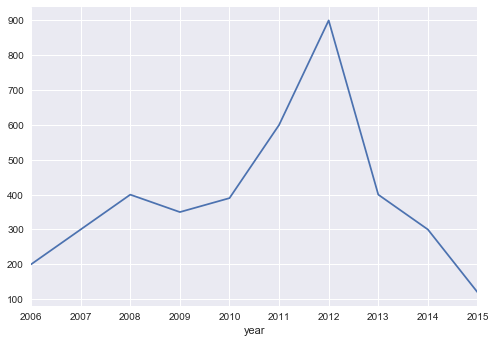

In [11]:
s.plot()

Series对象可利用pandas内置的plot()直接绘图，默认为折线图。

**折线图**多用于展示**数值型数据**，特别是用于展示历时数据。

统计学中，依据计量尺度，一般可将数据分为三种类型：
- 分类数据
- 顺序数据(定序数据)
- 数值型数据(定量数据)

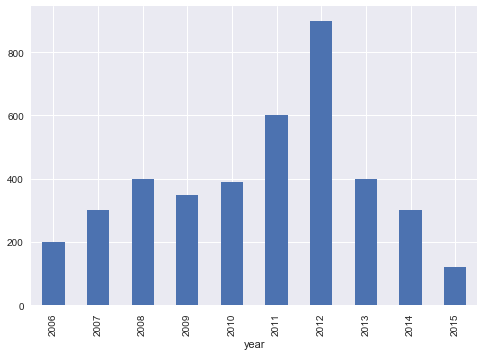

In [12]:
s.plot(kind='bar')

plot()函数的参数`kind`，可以指定plot()函数所绘制图形的种类，`'bar'`为柱状图。也可以采用这种形式：`s.plot.bar()`，效果与指定kind参数为bar类似。

**柱状图**用宽度相同的柱的高度或长短来表示数据多少。

柱状图一般用于展示**分类数据**，展示不同类别数据的多少(可将以上数据的每个年份理解为不同类别)。

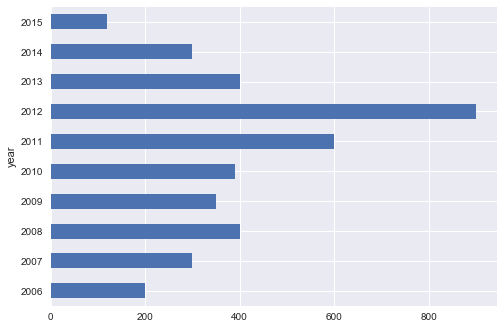

In [13]:
s.plot(kind='barh')

'barh'为条形图，与柱状图类似。

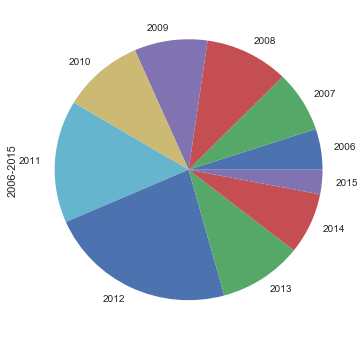

In [14]:
s.plot('pie',figsize=(6,6))

'pie'为饼图。
**饼图**使用圆形及圆内扇形的角度表示数值大小的图形。

一般也用于展示**分类数据**，用来表示各分类部分数据占全部数据的比例(频率分布)。

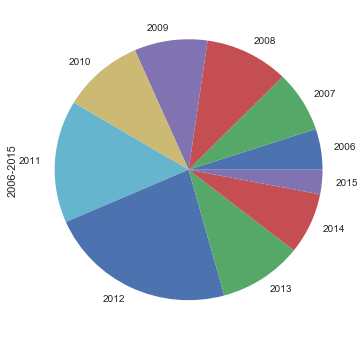

In [15]:
s.plot('pie',figsize=(6,6))

可利用plot()函数的`figsize`参数，设定图形的大小(长与宽)

### 2. 数据基本分析、度量与展示

**2.1 归一化**

**归一化**一般要使数值的绝对值变成**相对值**，将数值映射到[0,1]区间上。

在本例中，由于每个年度的语料大小不同，单纯观察每个年度某个词汇出现的频次(绝对值)，无法确定其出现的相对高低(相对值)。

因此可将频次归一化，即某词汇每年出现的次数/每年语料的总字数。这样，该词汇就可以利用频次归一化的数值进行横向比较了。

在实际中，也可以将频次归一化的结果乘以一个较大的整数。在本例中，可乘以10000000，表示语料中每10000000字出现该词汇的频次。

In [16]:
#python实现
def norm_freq(freqs, total_freqs, per = 1):
    return [per * freq/total_freq for freq, total_freq in zip(freqs, total_freqs)]

per = 10000000
s_norm = norm_freq(freq_dict['天长地久'], total_words_freq, per = 10000000)

上面的代码用python实现了将每年的频次归一化为每年每一千万字该词汇出现的频次。

In [17]:
s_norm = Series(s_norm, index = years)
s_norm

2006    162.008910
2007    127.899045
2008    179.107151
2009     76.700561
2010    349.964106
2011     91.696850
2012    202.502025
2013     72.000720
2014     86.901107
2015     21.595940
dtype: float64

利用归一化处理后的结果初始化一个Series对象s_norm。注意，此时value的数据类型自动转换为float。

In [18]:
#pandas的Series运算
s_norm = per * s / total_words_freq
s_norm

year
2006    162.008910
2007    127.899045
2008    179.107151
2009     76.700561
2010    349.964106
2011     91.696850
2012    202.502025
2013     72.000720
2014     86.901107
2015     21.595940
Name: 2006-2015, dtype: float64

也可以直接利用pandas的序列运算进行归一化。运算结果与python编写代码一直，但是更简洁。
- `s_norm = per * s / total_words_freq`，其中`s`为Series类型，`total_words_freq`为list类型，直接相除运算的结果是将s中每个对应的值除以list中每个值。这种向量/矩阵运算是numpy及pandas中非常常见的情况，一般被称为**矢量化操作**。

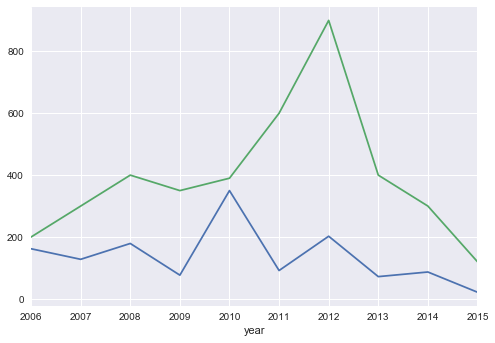

In [19]:
s_norm.plot()
s.plot()

再次绘图，并将两根折线展示在一个图上。

可以看出，归一化前，峰值出现在2012年；归一化后，峰值出现在2010年。

**1.2 求平均值**

In [20]:
#python实现
freq_mean = sum(freq_dict['天长地久'])/len(freq_dict['天长地久'])
freq_mean

396.0

计算均值的python代码。

除非特别指出，一般平均值指的就是**算数平均值**。

In [21]:
#pandas内置求均值函数
s.mean()

396.0

利用内置均值函数mean()更为简洁。

In [22]:
s_mean = Series([freq_mean]*10, index = years)
s_mean

2006    396.0
2007    396.0
2008    396.0
2009    396.0
2010    396.0
2011    396.0
2012    396.0
2013    396.0
2014    396.0
2015    396.0
dtype: float64

声明一个每年数值均为均值的Series对象s_mean。

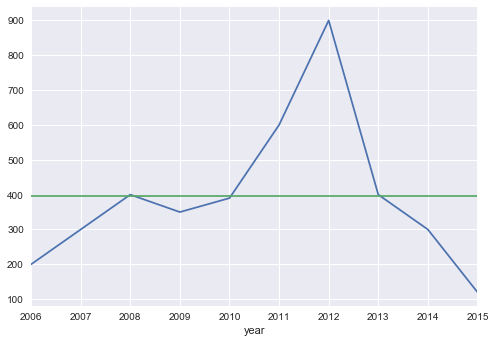

In [23]:
s.plot()
s_mean.plot()

将频次均值与各年频次画在一个图中

**1.3 样本方差、标准差、标准分及变异系数**

**方差**（variance)是在概率论和统计方差衡量随机变量或一组数据时离散程度的度量。
- 统计中的方差（样本方差）是每个样本值与全体样本值的平均数之差的平方值的平均数。

**总体**：包含所研究的全部个体(数据)的集合。

**样本**：从总体中抽取的一部分元素的集合。

**样本容量**：构成样本的元素的数量称为样本容量(size)。

样本方差计算公式为：
$$s^2 = \frac{1}{n-1}\sum_{i=1}^{n}(x_i-\widetilde x)^2$$

注意样本方差的公式中，分母为`n-1`。

In [24]:
#python实现方差
def variance(freqs):
    mean = sum(freqs)/len(freqs)
    return sum([(freq-mean)**2 for freq in freqs])/(len(freqs)-1)

freq_var = variance(freq_dict['天长地久'])
freq_var

47871.11111111111

上述代码用python实现了求样本方差。

In [25]:
#pandas内置方差
s.var()

47871.11111111111

而pandas内置求方差的函数var()更为简洁。· 

**标准差**：标准差是方差的算术平方根。

In [26]:
#pandas内置标准差
s.std()

218.7946779771188

Pandas内置std()函数,可得到序列s的标准差。

**标准分**：变量值与平均数的差除以标准差后的值，也称为**z分数**(z score)。

标准分的计算公式为：
$$z_i=\frac{x_i-\widetilde x}{s}$$

In [27]:
(s-s.mean())/s.std()

year
2006   -0.895817
2007   -0.438768
2008    0.018282
2009   -0.210243
2010   -0.027423
2011    0.932381
2012    2.303530
2013    0.018282
2014   -0.438768
2015   -1.261457
Name: 2006-2015, dtype: float64

上述代码可得到s中所有数值的标准分，存放在一个Series对象中。
标准差的**经验法则**(当一组数据对称分布时)：
- 约68%的数据在均值附近正负1个标准差内
- 约95%的数据在均值附近正负2个标准差内
- 约99%的数据在均值附近正负3个标准差内
在正负3个标准差以外的数据，称为**离群点(outlier)**。

**切比雪夫不等式**：对任意分布的一组数据，至少有(1-1/k^2)的数据落在正负k个标准差以内(k>1)。

**变异系数**(离散系数)：一组数据的标准差与该组数据均值之比。公式为：
$$v_i=\frac{s}{\widetilde x}$$

该系数是测度离散程度的相对统计量，主要用于比较不同演变数据的离散程度(特别对均值差异较大的数据组)。

In [28]:
#变异系数
s.std()/s.mean()

0.5525118130735324

变异系数可由标准差/均值直接得到。

**1.4 中位数、分位数、轴距与箱型图**

**中位数**(median)：中数是按顺序排列的一组数据中居于中间位置的数，即在这组数据中，有一半的数据比他大，有一半的数据比他小。如果观察值有偶数个，通常取最中间的两个数值的平均数作为中位数。

In [29]:
s_norm.median()

109.7979476168295

Pandas内置了median()函数，即求中位数函数。

**分位数**是将总体的全部数据按大小顺序排列后，处于各等分位置的变量值。
- 将全部数据分成相等的两部分，它就是中位数；如果分成四等分，就是四分位数；八等分就是八分位数。
- 四分位数也称为四分位点，它是将全部数据分成相等的四部分，其中每部分包括25%的数据，处在各分位点的数值就是四分位数。
- 四分位数有三个，第一个四分位数就是通常所说的四分位数，称为下四分位数，第二个四分位数就是中位数，第三个四分位数称为上四分位数，分别用Q1、Q2、Q3表示。

In [30]:
s_norm.quantile(0.25)

79.25069739255241

In [31]:
s_norm.quantile(0.75)

174.83259076226759

Pandas内置的quantile()函数可以求任意分位数，参数为0.25即Q1，参数为0.75即Q3。

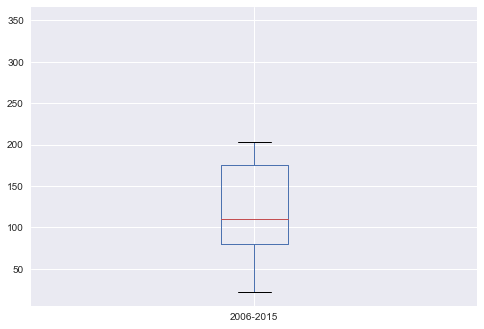

In [32]:
s_norm.plot(kind='box')

参数kind为`box`时，对应的就是**箱型图**。

箱型图中间的箱型一般由三根线组成，由下至上分别对应Q1，Q2，Q3；而箱型以外的上下两根线，分别对应最大值与最小值(不含离群点)

箱型图一般用于展示数值型数据，有助于对数据的整体分布有只管了解，特别有利于对离群点/异常点的观察。

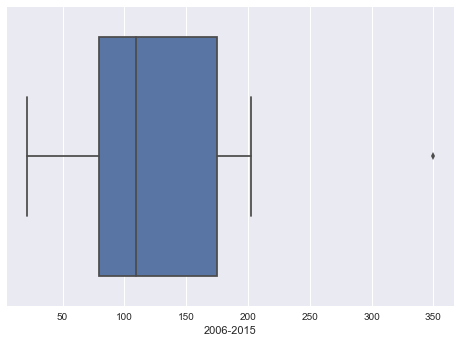

In [33]:
#Series箱型图离群点/异常点显示，利用seaborn
sns.boxplot(s_norm)

由于pandas内置的箱型图默认不含离群点，可直接利用seaborn中的boxplot函数，为Series对象绘制带离群点的箱型图。

**1.5 样本的累积和**（累积频数与累积频率）

**累积频数**(cumulative frequencies)，将各有序类别或组的频数逐级累加起来的频数。

**累积频率**(cumulative percentages)，将各有序类别或组的百分比逐级累加起来。

In [34]:
s.cumsum()

year
2006     200
2007     500
2008     900
2009    1250
2010    1640
2011    2240
2012    3140
2013    3540
2014    3840
2015    3960
Name: 2006-2015, dtype: int64

Pandas内置了cumsum()函数，可以直接得到累积频数。

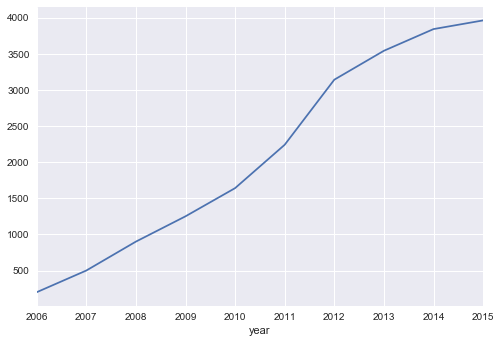

In [35]:
s.cumsum().plot()

利用cumsum()得到的仍然是Series对象，可以直接绘图。

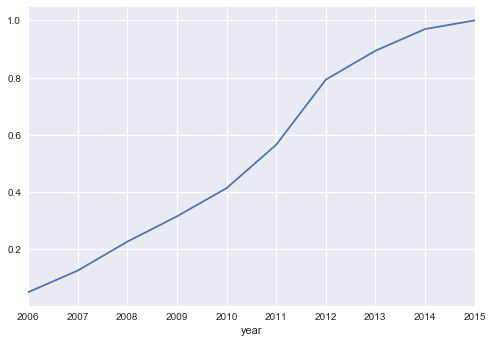

In [36]:
s_ratio = s/s.sum()
s_ratio.cumsum().plot()

累积频率(累积百分比)可以类似的得到。

`sum()`为内置的求Series对象中value和的函数。

**1.6 最大值、最小值、众数及总体描述**

In [37]:
s.max()

900

内置最大值函数max()

In [38]:
s.min()

120

内置最小值函数min()

In [39]:
s.mode()

0    300
1    400
dtype: int64

**众数**(mode)：一组数据中出现次数最多的数据值。一般用于测度分类数据的集中趋势，在数据量较大的时候有意义。
Pandas内置mode()函数，可以直接得到众数，注意众数可能不唯一，如此时s的众数有两个。

In [40]:
s.describe()

count     10.000000
mean     396.000000
std      218.794678
min      120.000000
25%      300.000000
50%      370.000000
75%      400.000000
max      900.000000
Name: 2006-2015, dtype: float64

Pandas的descibe()函数，可以给出汇总与描述统计的常用值。其中count为数据个数。

**1.7 随机数、直方图、峰度与偏度**(公式以后有时间补充)

In [41]:
np.random.seed(66)

调用np中random模块的seed()方法，生成一个随机数种子，在这个种子下，每次第一次生成的随机数均相同。

In [42]:
arr1 = np.random.randn(10000)
arr1

array([ 1.41561436, -1.0852864 , -0.61630804, ...,  0.08479998,
       -1.16755255,  1.13461007])

利用random的randn()函数，生成一个numpy的array类型的对象，大小为10000，可理解为长度为10000的数组(所有数据元素类型相同)。

数组内数据分布为正态分布。randn即random normal。

In [43]:
arr2 = np.random.randn(50)
arr2

array([ 2.28112862,  0.51138372,  0.68988585,  0.67582702,  0.63808164,
       -1.0410448 , -0.91601431, -1.64294384,  2.16465592, -0.67004449,
        0.46737616,  0.90362682, -0.34551556, -0.05367347,  0.46465691,
        1.37674635, -0.21249989, -2.14939938, -0.25040615,  1.43040674,
        0.27824394,  0.20567202, -0.68650085,  0.75210394, -1.12895709,
        0.68402948, -0.28490141,  0.29969392,  0.14210905, -0.11570231,
       -0.48913203, -0.74924755, -1.52762847, -0.99353886,  1.81620157,
       -1.20129803, -0.93263586, -0.36954506,  0.08467705,  0.61107937,
        0.50382233, -1.12408078,  0.398812  ,  1.497698  ,  0.78490215,
        0.55041055, -0.25888733,  0.39002582, -1.41102818, -2.09786379])

与前类似，生成了一个长度为50的array，数据为正态分布。

In [44]:
s_1 = Series(arr1)
s_2 = Series(arr2)

Numpy的array类型可以直接初始化为Series类型的对象。

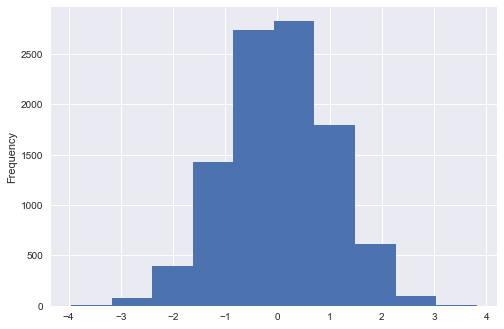

In [45]:
s_1.plot(kind='hist')

**直方图**(histogram)：又称质量分布图，是数值数据分布的精确图形表示。
- 将值的范围分段，即将整个值的范围分成一系列间隔(一般要相等)
- 计算每个间隔中有多少值

当plot()函数的kind参数为hist时，即代表直方图。

此外，Pandas内置hist()函数，可对Series对象直接绘制直方图：`s_norm.hist()`。

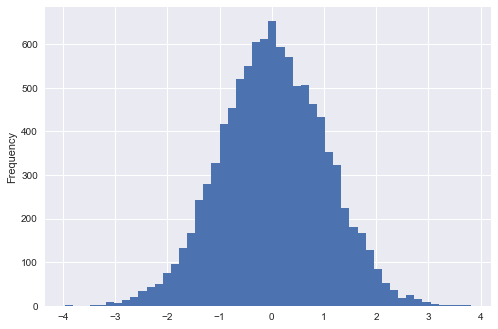

In [46]:
s_1.plot(kind='hist',bins=50)

Plot()函数有一个重要参数`bins`，指定了间隔个数。此处将间隔数设为50.

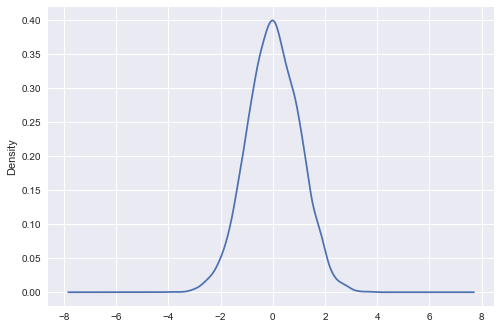

In [47]:
s_1.plot(kind='kde')

**核密度估计图**(Kernel Density Estimation, KDE)：采用平滑的峰值函数(“核函数”)来拟合观察到的数据点，从而对真实的概率分布曲线进行模拟。
Pandas的plot()函数中，参数kind的值为kde时，即可绘制KDE图。

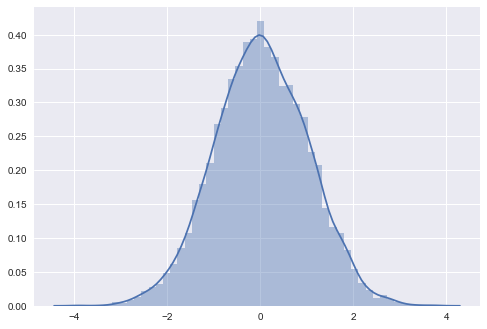

In [48]:
sns.distplot(s_1)

Seaborn中内置的distplot()函数，可以直接对Series对象绘制直方图及KDE图的合一图。

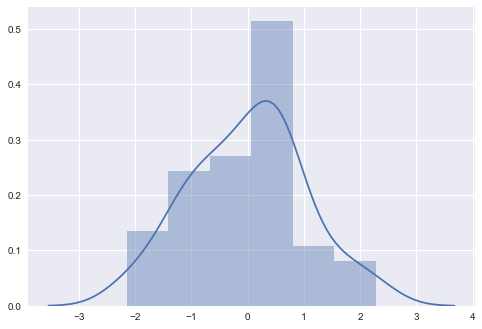

In [49]:
sns.distplot(s_2)

类似地，可以为s_2绘制histogram及kde图。

In [50]:
s_1.skew(),s_2.skew(),s_1.kurt(),s_2.kurt(),

(-0.0063696106929140347,
 0.027355468589977068,
 -0.020933532783578457,
 -0.20411177773807099)

**偏度**(Skewness)、偏态、偏态系数，是统计数据分布偏斜方向和程度的度量，是统计数据分布非对称程度的数字特征。正态分布的偏度为零。
- Skewness=0 分布形态与正态分布偏度相同
- Skewness>0 正偏差数值较大，为正偏或右偏。长尾巴拖在右边。
- Skewness<0 负偏差数值较大，为负偏或左偏。长尾巴拖在左边。

**峰度**(Kurtosis)、峰态、峰态系数，是描述总体中所有取值分布形态陡缓程度的统计量。正态分布的峰度为3(也有很多将计算得到的峰度-3，而使正态分布峰度为零的做法)。
- Kurtosis=3(或0) 分布形态与正态分布峰度相同
- Kurtosis>3(或0) 正偏差数值较大，尖峰，厚尾。
- Kurtosis<3(或0) 负偏差数值较大，扁峰，薄尾。

本例中，s_1比s_2更接近于正态分布。

### 3. Series类型基本操作整理
**3.1 创建与查看**

创建一个Series的基本方法是：s = Series(data, index=index)。其中，data指代许多不同的数据类型：
- a Python dict
- an ndarray
- a scalar value (like 6)

index指一个标签序列，一般用list类型。

**3.1.1 利用list创建Series**

In [51]:
s = Series([x*x for x in range(100)])
s

0        0
1        1
2        4
3        9
4       16
5       25
6       36
7       49
8       64
9       81
10     100
11     121
12     144
13     169
14     196
15     225
16     256
17     289
18     324
19     361
20     400
21     441
22     484
23     529
24     576
25     625
26     676
27     729
28     784
29     841
      ... 
70    4900
71    5041
72    5184
73    5329
74    5476
75    5625
76    5776
77    5929
78    6084
79    6241
80    6400
81    6561
82    6724
83    6889
84    7056
85    7225
86    7396
87    7569
88    7744
89    7921
90    8100
91    8281
92    8464
93    8649
94    8836
95    9025
96    9216
97    9409
98    9604
99    9801
dtype: int64

- 第一行利用一个list，创建了一个Series对象s
- 第二行查看该对象。
- 该对象由两部分组成，第一列为index，第二列为values。

In [52]:
s.head()

0     0
1     1
2     4
3     9
4    16
dtype: int64

数据太长，可用head()函数查看前几个数据。

In [53]:
s.tail(10)

90    8100
91    8281
92    8464
93    8649
94    8836
95    9025
96    9216
97    9409
98    9604
99    9801
dtype: int64

也可用tail()函数查看最后几个数据，head()及tail()函数内可放整型参数，代表列出的数据个数。

In [54]:
s.values

array([   0,    1,    4,    9,   16,   25,   36,   49,   64,   81,  100,
        121,  144,  169,  196,  225,  256,  289,  324,  361,  400,  441,
        484,  529,  576,  625,  676,  729,  784,  841,  900,  961, 1024,
       1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849,
       1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916,
       3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225,
       4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776,
       5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569,
       7744, 7921, 8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604,
       9801], dtype=int64)

查看序列s的值

In [55]:
type(s.values)

numpy.ndarray

- 查看s.values的类型
- Series对象的values的类型确实为numpy的array（数组）类型，即ndarray(n维数组)

In [56]:
s.index

RangeIndex(start=0, stop=100, step=1)

- 查看s的index(索引)的值

In [57]:
type(s.index)

pandas.indexes.range.RangeIndex

- 查看s.index的类型
- Series对象的索引在未指定时，为pandas内置的RangeIndex类型，类似于python的range类型。

In [58]:
s2 = Series([x*x for x in range(26)], index=set('abcdefghijklmnopqrstuvwxyz'))
s2.head()

n     0
o     1
w     4
s     9
g    16
dtype: int64

- 利用list创建Series对象时，可用index参数指定一个list或set对应索引。

In [59]:
type(s2.index), s2.index

(pandas.indexes.base.Index,
 Index(['n', 'o', 'w', 's', 'g', 'p', 'm', 'i', 'a', 'y', 'j', 'v', 'k', 'e',
        'u', 'x', 'r', 'q', 'l', 'c', 'b', 't', 'd', 'z', 'f', 'h'],
       dtype='object'))

- 指定索引后，Series对象的索引是pandas内置的Index类型

**3.1.2 利用dict创建Series**

In [60]:
data = {'喜欢':3000,'爱':7000,'讨厌':1000,'恨':500}
s3 = Series(data)
s3

喜欢    3000
恨      500
爱     7000
讨厌    1000
dtype: int64

- 可用dict创建Series对象，则字典的键自动成为index

In [61]:
s3 = Series(data, index = ['a','b','c','爱'])
s3

a       NaN
b       NaN
c       NaN
爱    7000.0
dtype: float64

- 初始化时，也可以额外指定index。但是如果指定的index找不到对应的值，则该index对应值设为NaN（Not a Number）

**3.1.3 利用标量创建Series对象**

In [62]:
s0 = Series(5, index = ['a','b','c','d','e'])
s0

a    5
b    5
c    5
d    5
e    5
dtype: int64

- 利用标量创建Series对象时，对象的值将均为标量的值

**3.1.4 利用Series对象创建Series对象**

In [63]:
s4 = Series(s3)
s4

a       NaN
b       NaN
c       NaN
爱    7000.0
dtype: float64

- 这是最简单的利用Series对象创建Series对象的代码

In [64]:
s5 = Series(s4, index = ['喜欢','爱','讨厌','中'])
s5

喜欢       NaN
爱     7000.0
讨厌       NaN
中        NaN
dtype: float64

- 与利用dict初始化类似，也可以额外指定index。

**3.2 访问Series对象的元素**

In [65]:
s4[0], s4['爱'], s4.爱

(nan, 7000.0, 7000.0)

- 利用位置索引或者index均可以访问对应元素
- 还可以利用index的值作为属性来访问对应元素

In [103]:
s4[0:2]

喜欢       NaN
爱     4078.0
dtype: float64

In [67]:
s4['喜欢':'爱']

爱    7000.0
dtype: float64

- 位置索引及index的切片访问也适用，但利用index切片是包含末端的

In [105]:
s4.iloc[1], s4.iloc[1:3]

(4078.0, 爱     4078.0
 讨厌       NaN
 dtype: float64)

- 有时会遇到Index是整数的情况，为避免歧义，可以用iloc来利用位置进行元素选取

In [69]:
s4.index

Index(['a', 'b', 'c', '爱'], dtype='object')

- 可以利用index属性访问Series对象的索引

In [70]:
s4.values

array([   nan,    nan,    nan,  7000.])

- 可以利用values属性访问Series对象的值

In [71]:
for k, v in s4.items():
    print(k, v)

a nan
b nan
c nan
爱 7000.0


In [72]:
for k in s4.keys():
    print(k)

a
b
c
爱


In [73]:
for v in s4:
    print(v)

nan
nan
nan
7000.0


- 可以类似dict一样迭代访问Series对象的各个元素

In [74]:
for k in s4.index:
    print(k)

a
b
c
爱


In [75]:
for v in s4.values:
    print(v)

nan
nan
nan
7000.0


- 也可以利用index与values属性迭代访问

**3.3 修改、删除、排序等基本运算**

In [76]:
s4[0] = 10000
s4

a    10000.0
b        NaN
c        NaN
爱     7000.0
dtype: float64

In [77]:
s4['爱'] = 4078
s4

a    10000.0
b        NaN
c        NaN
爱     4078.0
dtype: float64

- Series对象内的值可以直接根据位置或index被赋值（修改）

In [78]:
s4[0:3] = 666
s4

a     666.0
b     666.0
c     666.0
爱    4078.0
dtype: float64

- 可以切片式赋值

In [79]:
s4.index = ['a', 'b', 'c', 'd']
s4

a     666.0
b     666.0
c     666.0
d    4078.0
dtype: float64

- Series对象的index可以直接被赋值（修改），注意新的index的长度要与Series对象中index的长度一致。

In [80]:
s4 = s3.reindex(['喜欢','爱','讨厌','中', 'e'])
s4

喜欢       NaN
爱     4078.0
讨厌       NaN
中        NaN
e        NaN
dtype: float64

- 可用reindex方法来更改index，找不到对应值的index，则其值为NaN。

In [81]:
s5 = s4.drop('e')
s4

喜欢       NaN
爱     4078.0
讨厌       NaN
中        NaN
e        NaN
dtype: float64

In [82]:
s5

喜欢       NaN
爱     4078.0
讨厌       NaN
中        NaN
dtype: float64

- 可利用drop函数删除指定索引及值，生成新的Series对象，但原series对象不变。

In [83]:
s4+s5

e        NaN
中        NaN
喜欢       NaN
爱     8156.0
讨厌       NaN
dtype: float64

In [84]:
s4-s5

e     NaN
中     NaN
喜欢    NaN
爱     0.0
讨厌    NaN
dtype: float64

In [85]:
s4*s5

e            NaN
中            NaN
喜欢           NaN
爱     16630084.0
讨厌           NaN
dtype: float64

In [86]:
s4/s5

e     NaN
中     NaN
喜欢    NaN
爱     1.0
讨厌    NaN
dtype: float64

- Serires对象可以直接进行四则运算，运算规则是对应索引的值进行运算，整体运算结果仍然是Series对象。
- 如果索引值无法对应，则结果为NaN。

In [87]:
s4.sort_values()

爱     4078.0
喜欢       NaN
讨厌       NaN
中        NaN
e        NaN
dtype: float64

- 按照values（值）进行排序，按值排序时，NaN将排在尾端

In [88]:
s4.sort_index()

e        NaN
中        NaN
喜欢       NaN
爱     4078.0
讨厌       NaN
dtype: float64

- 按照index（索引）进行排序

In [89]:
s4.sort_values(ascending=False)

爱     4078.0
喜欢       NaN
讨厌       NaN
中        NaN
e        NaN
dtype: float64

- 将ascending参数指定为False，则变为倒序排序

**3.4 处理NaN值**

In [90]:
s5 = s4.fillna(1)
s5

喜欢       1.0
爱     4078.0
讨厌       1.0
中        1.0
e        1.0
dtype: float64

- 可以利用内置fillna()函数，将NaN值替换为指定数值

In [91]:
s6 = s4.reindex(['喜欢','爱','不讨厌','中'], fill_value = 0)
s6

喜欢        NaN
爱      4078.0
不讨厌       0.0
中         NaN
dtype: float64

- 可在reindex方法内利用fill_value参数，指定值来替换在重新索引时新出现的NaN值，
- 注意，fill_value参数与不会对原有NaN值进行替换。

In [92]:
s4.add(s6)

e         NaN
不讨厌       NaN
中         NaN
喜欢        NaN
爱      8156.0
讨厌        NaN
dtype: float64

In [93]:
s4.add(s6, fill_value=0)

e         NaN
不讨厌       0.0
中         NaN
喜欢        NaN
爱      8156.0
讨厌        NaN
dtype: float64

- 两个Series对象相加可用add方法，设置fill_value参数的值，替换非对齐index部分的NaN值。fill_value参数不会对运算前的NaN进行填充。
- 类似还有sub，div，mul方法，分别对应减法、除法及乘法。

**3.5 过滤**

In [94]:
s > 1000

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
      ...  
70     True
71     True
72     True
73     True
74     True
75     True
76     True
77     True
78     True
79     True
80     True
81     True
82     True
83     True
84     True
85     True
86     True
87     True
88     True
89     True
90     True
91     True
92     True
93     True
94     True
95     True
96     True
97     True
98     True
99     True
dtype: bool

- Series对象进行比较等逻辑运算，结果仍然是一个Series对象，每一维度的值根据运算结果为True或False

In [95]:
s[s>1000]

32    1024
33    1089
34    1156
35    1225
36    1296
37    1369
38    1444
39    1521
40    1600
41    1681
42    1764
43    1849
44    1936
45    2025
46    2116
47    2209
48    2304
49    2401
50    2500
51    2601
52    2704
53    2809
54    2916
55    3025
56    3136
57    3249
58    3364
59    3481
60    3600
61    3721
      ... 
70    4900
71    5041
72    5184
73    5329
74    5476
75    5625
76    5776
77    5929
78    6084
79    6241
80    6400
81    6561
82    6724
83    6889
84    7056
85    7225
86    7396
87    7569
88    7744
89    7921
90    8100
91    8281
92    8464
93    8649
94    8836
95    9025
96    9216
97    9409
98    9604
99    9801
dtype: int64

- 可以利用逻辑运算的结果Series，对Series对象进行过滤，得到满足条件的Series

**3.6 时间序列(Time Series)**示例

In [96]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

- Pandas内置的date_range()函数，可以很方便的得到时间标签
- 第一个参数'1/1/2012'为时间字符串，表示开始时间
- 第二个参数periods为时间标签个数，此处设为100
- 第三个参数freq为时间频率间隔，此处的'S'表示间隔为秒，常用的为S,Min,H,D,M分别为秒、分、小时、天，月。

In [97]:
ts = Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.head()

2012-01-01 00:00:00     18
2012-01-01 00:00:01     98
2012-01-01 00:00:02    182
2012-01-01 00:00:03    371
2012-01-01 00:00:04    193
Freq: S, dtype: int32

- 将时间标签作为Series对象的index，随机生成0-500间100个整数，作为Series对象的值。

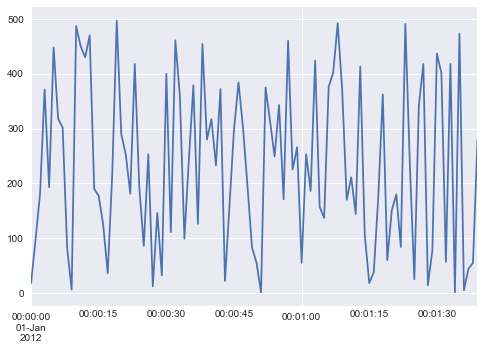

In [98]:
ts.plot()

- 利用plot()函数绘图

In [99]:
ts1 = ts.resample('Min').mean()
ts1

2012-01-01 00:00:00    244.950
2012-01-01 00:01:00    218.425
Freq: T, dtype: float64

- 利用resample()函数，可将时间序列重新抽样。
- 样本时间间隔根据resample()函数参数决定，本例中，样本时间间隔设为分钟(Min)
- 重新设定样本间隔后，可利用mean()函数，求得每个时间间隔内值的均值，作为新的index对应的值

**3.7 输出**

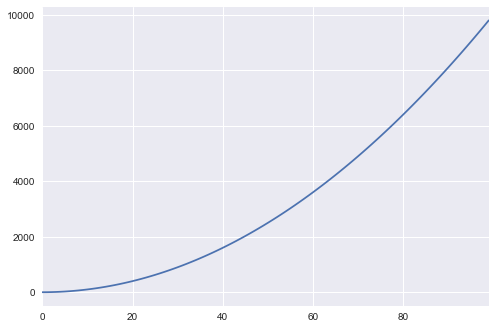

In [100]:
s.plot()
plt.savefig('test.jpg')

- 利用内置的plot()函数展示图片后，可利用plt的savefig()函数将图片保存为文件输出。
- 可以查看当前目录下的test.jpg文件，与当前显示一致。

In [101]:
s.to_csv('test.csv')

- 利用to_csv()函数，可将Series对象输出为.csv文件
- 可在当前目录下，找到test.csv，双击打开查看